<a href="https://colab.research.google.com/github/srujanay18/knn_assignment/blob/main/FINAL_A4_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This colab does Q1 and Q2 only

# Q1:
## What is the difference between regression and classification?
Regression is when you predict a numeric outcome. Classification is when you predict a categorical outcome.

## What is a confusion table? What does it help us understand about a model's performance?
A confusion table is a cross-tabulation of predicted and actual values. In terms of performance, it helps us understand the successes and failures of a model.

## What does the SSE quantify about a particular model?
SSE finds the sum of squared error from the squared difference from the prediction, to the true outcome for each point in the validation set.

## What are overfitting and underfitting?
Overfitting is when the model is too complex to reliably explain the phenomenon you are interested in. Underfitting is when the model is too simple to reliably explain the phenomenon you are interested in.

## Why does splitting the data into training and testing sets, and choosing by evaluating accuracy or SSE on the test set, improve model performance?
Splitting the data provides an unbiased evaluation of how the model will perform on new, unseen data, which prevents and detects overfitting. Training the model on one set and testing on another allows for a realistic assessment of its generalization ability, making sure that the model has actually learned underlying patterns rather than just memorizing from the training data. Using metrics like accuracy or SSE on the test set gives a trustworthy measure of the model's real-world performance.

## With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
With classification, predicting a class label gives a clear and direct output, which makes it easy to interpret and use in decision-making. The weakness is that it ignores uncertainty; if the model is unsure, it still forces a single choice that might be misleading. Predicting a probability distribution captures uncertainty by showing how confident the model is in each possible class. This is helpful when decisions depend on risk or when thresholds can be adjusted. The weakness is that probability distributions are more complex to interpret and can be unreliable if the model is poorly made.

# Q2: This question is a case study for nearest neighbor regression, using the USA_cars_datasets.csv data.

The target variable y is price and the features are year and mileage.

In [4]:
# Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

DATA_PATH = "/content/USA_cars_datasets.csv"

df_raw = pd.read_csv(DATA_PATH)
df = df_raw.loc[:, ["price", "year", "mileage"]].copy()

display(df.head())

print(df.shape)
print(df.isna().sum())

df = df.dropna(subset=["price", "year", "mileage"]).reset_index(drop=True)
print(df.shape)

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


(2499, 3)
price      0
year       0
mileage    0
dtype: int64
(2499, 3)


In [11]:
# Maxmin normalize year and mileage.
# Split the sample into ~80% for training and ~20% for evaluation.
X_full = df[["year", "mileage"]].astype(float).values
y_full = df["price"].astype(float).values


X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.20, random_state=42
)

# 3) fit min–max on TRAIN ONLY
train_min = X_train_raw.min(axis=0)
train_max = X_train_raw.max(axis=0)
denom = np.where((train_max - train_min) == 0, 1.0, (train_max - train_min))

# 4) transform train and test using TRAIN stats
X_train = (X_train_raw - train_min) / denom
X_test  = (X_test_raw  - train_min) / denom

print(X_train.shape[0])
print(X_test.shape[0])

1999
500


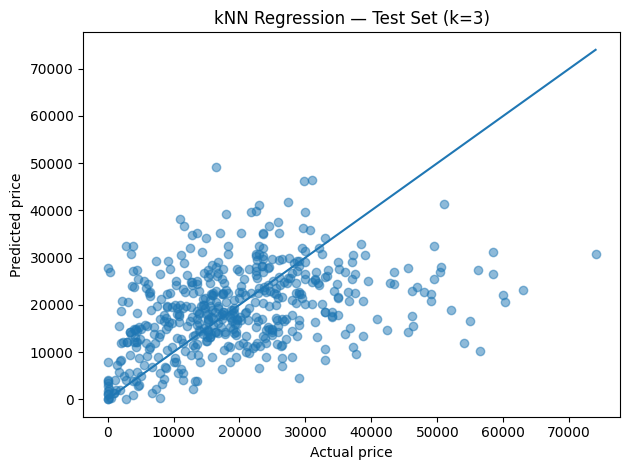

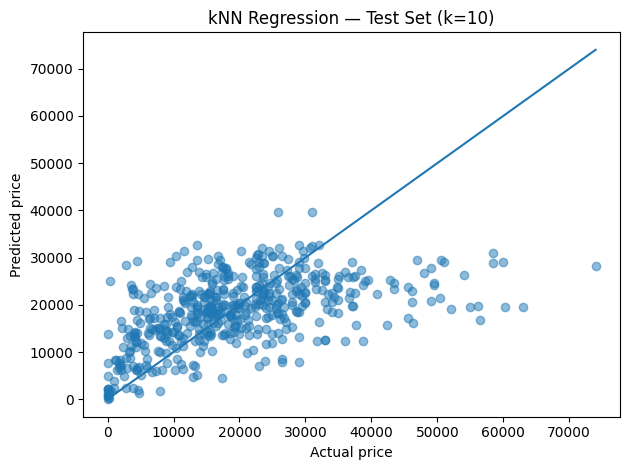

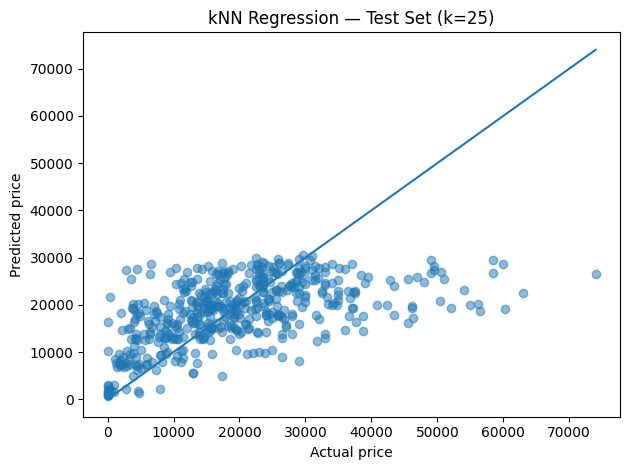

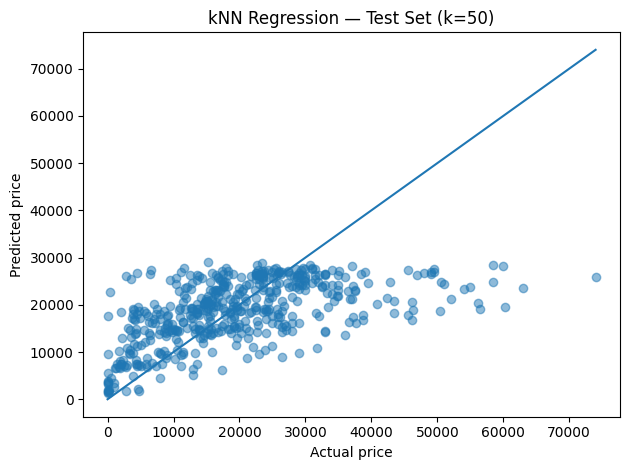

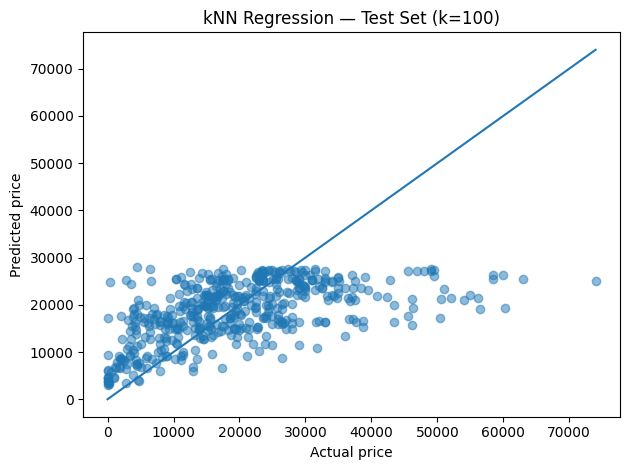

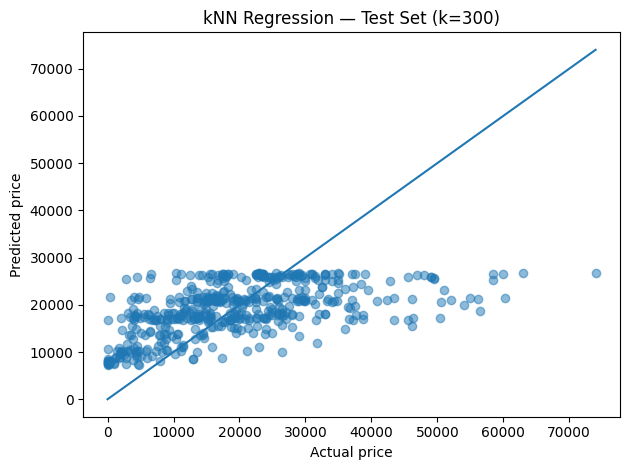

,k,test_mse
0,3,1.480659e+08
1,10,1.173991e+08
2,25,1.125762e+08
3,50,1.102025e+08
4,100,1.122539e+08
5,300,1.144963e+08


In [7]:
# Use the kNN algorithm and the training data to predict price using year and mileage for the test set for k = 3, 10, 25, 50, 100, 300.
# For each value of k, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value.
# What patterns do you notice as you increase k?
k_values = [3, 10, 25, 50, 100, 300]
results = []

def scatter_true_vs_pred(y_true, y_pred, k):
    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.5)
    a = min(np.min(y_true), np.min(y_pred))
    b = max(np.max(y_true), np.max(y_pred))
    plt.plot([a, b], [a, b])  # 45-degree line
    plt.xlabel("Actual price")
    plt.ylabel("Predicted price")
    plt.title(f"kNN Regression — Test Set (k={k})")
    plt.tight_layout()
    plt.show()

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append({"k": k, "test_mse": mse})
    scatter_true_vs_pred(y_test, y_pred, k)

results_df = pd.DataFrame(results).sort_values("k").reset_index(drop=True)
display(results_df)

In [9]:
# Determine the optimal k for these data.
best_idx = results_df["test_mse"].idxmin()
best_k = int(results_df.loc[best_idx, "k"])
best_mse = float(results_df.loc[best_idx, "test_mse"])

print(best_k)
print(best_mse)

50
110202549.3014296


## Describe what happened in the plots of predicted versus actual prices as k varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

As k was small (for example, 3), the model overfit, so predictions moved to the extremes, so points scattered away from the 45 degree line. As k moved to a moderate range (around 25–50), variance dropped and the fit improved. The cloud tightened around the diagonal, with the best performance at k=50. As k got large (from 100–300), the model underfit, so predictions collapsed toward the average price and the slope looked flatter than 45 degrees. Overall, small k = overfitting, large k = underfitting, and a mid-range k balanced bias and variance best.